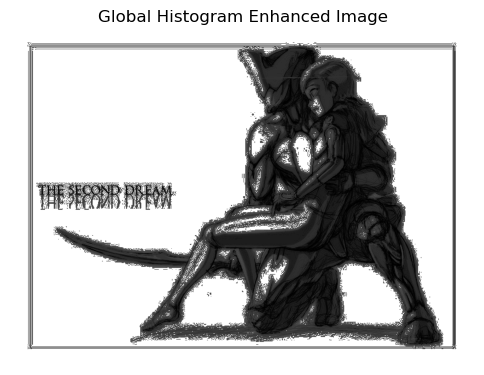

In [5]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk
import matplotlib.pyplot as plt

# Image transformation functions
def linear_transform(image, c, b):
    return np.clip(c * image + b, 0, 255).astype(np.uint8)

def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    return np.clip(c * np.log(1 + image), 0, 255).astype(np.uint8)

def piecewise_transform(image):
    def transform(x):
        if x <= 50:
            return x * 10
        elif 51 <= x <= 150:
            return x * 20
        else:
            return x * 50
    vectorized_transform = np.vectorize(transform)
    return np.clip(vectorized_transform(image), 0, 255).astype(np.uint8)

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def clahe_transform(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Function to apply selected enhancement technique
def apply_enhancement(image, technique, c=None, b=None):
    if technique == 'Linear':
        return linear_transform(image, c, b)
    elif technique == 'Log':
        return log_transform(image)
    elif technique == 'Piecewise':
        return piecewise_transform(image)
    elif technique == 'Global Histogram':
        return histogram_equalization(image)
    elif technique == 'Local Histogram':
        return clahe_transform(image)

# Function to open an image
def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            messagebox.showerror("Error", "Cannot open image.")
            return
        apply_enhancement_interface(image)

# Interface for applying enhancement techniques
def apply_enhancement_interface(image):
    def on_apply():
        technique = technique_var.get()
        if technique == 'Linear':
            try:
                c = float(c_entry.get())
                b = float(b_entry.get())
            except ValueError:
                messagebox.showerror("Error", "Please enter valid numbers for c and b.")
                return
            enhanced_image = apply_enhancement(image, technique, c=c, b=b)
        else:
            enhanced_image = apply_enhancement(image, technique)
        
        plt.figure(figsize=(6, 6))
        plt.imshow(enhanced_image, cmap='gray')
        plt.title(f'{technique} Enhanced Image')
        plt.axis('off')
        plt.show()

    def update_entries():
        if technique_var.get() == 'Linear':
            c_entry.config(state='normal')
            b_entry.config(state='normal')
        else:
            c_entry.config(state='disabled')
            b_entry.config(state='disabled')

    window = tk.Toplevel()
    window.title("Select Enhancement Technique")

    technique_var = tk.StringVar(value='Linear')
    technique_label = tk.Label(window, text="Choose Enhancement Technique:")
    technique_label.pack(pady=5)

    techniques = ['Linear', 'Log', 'Piecewise', 'Global Histogram', 'Local Histogram']
    technique_menu = ttk.Combobox(window, textvariable=technique_var, values=techniques)
    technique_menu.pack(pady=5)
    technique_menu.bind("<<ComboboxSelected>>", lambda e: update_entries())

    c_label = tk.Label(window, text="Enter value for c (Linear only):")
    c_label.pack(pady=5)
    c_entry = tk.Entry(window)
    c_entry.pack(pady=5)

    b_label = tk.Label(window, text="Enter value for b (Linear only):")
    b_label.pack(pady=5)
    b_entry = tk.Entry(window)
    b_entry.pack(pady=5)

    apply_button = tk.Button(window, text="Apply Enhancement", command=on_apply)
    apply_button.pack(pady=10)

    update_entries()  # Initialize the state of the entries based on the default technique

    window.mainloop()

# Main application window
root = tk.Tk()
root.title("Image Enhancement Tool")

open_button = tk.Button(root, text="Open Image", command=open_image)
open_button.pack(pady=20)

root.mainloop()